In [12]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
# Load the dataset
df = pd.read_csv('/Users/keerthireddy/Documents/GitHub/RecipeRecommendationSystem/Food_Recipe.csv')

# Basic statistics
print(df.describe())
print(df.info())

       prep_time (in mins)  cook_time (in mins)
count          7289.000000          7289.000000
mean             28.973659            32.171766
std              86.234272            92.673236
min               0.000000             0.000000
25%              10.000000            20.000000
50%              15.000000            30.000000
75%              20.000000            35.000000
max            2880.000000          7200.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7316 entries, 0 to 7315
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   name                  7316 non-null   object 
 1   description           7315 non-null   object 
 2   cuisine               7254 non-null   object 
 3   course                7172 non-null   object 
 4   diet                  7178 non-null   object 
 5   ingredients_name      7309 non-null   object 
 6   ingredients_quantity  7309 non-null   object 
 7

In [13]:
print(df.isnull().sum())

name                      0
description               1
cuisine                  62
course                  144
diet                    138
ingredients_name          7
ingredients_quantity      7
prep_time (in mins)      27
cook_time (in mins)      27
instructions              0
image_url                 0
dtype: int64


In [14]:
# Drop rows with missing values
df_cleaned = df.dropna()

# Remove duplicate rows
df_cleaned = df_cleaned.drop_duplicates()

# Reset the index
df_cleaned = df_cleaned.reset_index(drop=True)

# Convert columns to appropriate data types
df_cleaned['prep_time (in mins)'] = df_cleaned['prep_time (in mins)'].astype(int)
df_cleaned['cook_time (in mins)'] = df_cleaned['cook_time (in mins)'].astype(int)

# Remove unnecessary columns
df_cleaned = df_cleaned.drop(['image_url'], axis=1)

# Print the cleaned dataset
print(df_cleaned)

                                                   name  \
0     Mint Vegetables Moilee Recipe (Mixed Vegetable...   
1     Potato And Peas Curry Recipe In Coconut Milk G...   
2     Whole Wheat Chocolate Chip Pancakes With Apple...   
3     Kollu Pachadi Recipe (Sprouted Horse gram Rait...   
4                                      Recipe Bed Belts   
...                                                 ...   
7074                 Eggless Tutti Frutti Cookie Recipe   
7075                        Chocolate Chip Scone Recipe   
7076                               Kashmiri Roth Recipe   
7077                    Oatmeal Cranberry Cookie Recipe   
7078  Choco Swirl Cookies Recipe (Eggless Choco Pinw...   

                                            description          cuisine  \
0     Moilee is a very traditional Kerala dish where...   Kerala Recipes   
1     Potato And Peas In Coconut Milk Curry Recipe i...           Indian   
2     Whole Wheat Chocolate Chip Pancakes with zeste...      Co

In [15]:
# Fill missing descriptions with an empty string
#df['description'].fillna('', inplace=True)
df.fillna({'description': ''}, inplace=True)
# Drop rows with missing values in other columns
df.dropna(subset=['cuisine', 'course', 'diet', 'ingredients_name', 'ingredients_quantity', 'prep_time (in mins)', 'cook_time (in mins)'], inplace=True)

# Verify no missing values remain
print(df.isnull().sum())


name                    0
description             0
cuisine                 0
course                  0
diet                    0
ingredients_name        0
ingredients_quantity    0
prep_time (in mins)     0
cook_time (in mins)     0
instructions            0
image_url               0
dtype: int64


In [16]:

# Check the dimensions of the dataset
print("Dataset dimensions:", df.shape)

# Check the data types of each column
print(df.dtypes)


Dataset dimensions: (7096, 11)
name                     object
description              object
cuisine                  object
course                   object
diet                     object
ingredients_name         object
ingredients_quantity     object
prep_time (in mins)     float64
cook_time (in mins)     float64
instructions             object
image_url                object
dtype: object


In [17]:
# Check for missing values
print("Missing values:\n", df.isnull().sum())


Missing values:
 name                    0
description             0
cuisine                 0
course                  0
diet                    0
ingredients_name        0
ingredients_quantity    0
prep_time (in mins)     0
cook_time (in mins)     0
instructions            0
image_url               0
dtype: int64


In [18]:
# Summary statistics
print("Summary statistics:\n", df.describe())

Summary statistics:
        prep_time (in mins)  cook_time (in mins)
count          7096.000000          7096.000000
mean             29.141488            31.410795
std              85.487932            39.436209
min               0.000000             0.000000
25%              10.000000            20.000000
50%              15.000000            30.000000
75%              20.000000            35.000000
max            2880.000000          1440.000000


In [19]:

# Count the number of unique values in each column
print("Unique value counts:\n", df.nunique())

Unique value counts:
 name                    7024
description             7075
cuisine                   78
course                    13
diet                      10
ingredients_name        7051
ingredients_quantity    7070
prep_time (in mins)       87
cook_time (in mins)       68
instructions            7077
image_url               6215
dtype: int64


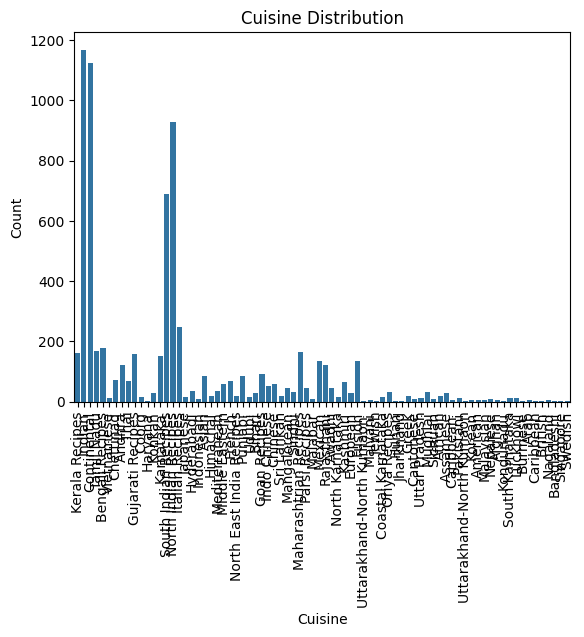

In [20]:
# Visualize the distribution of the target variable
sns.countplot(x='cuisine', data=df)
plt.title('Cuisine Distribution')
plt.xlabel('Cuisine')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

/var/folders/d4/cdqb2nds3z920hd3m7jrzhbm0000gn/T/ipykernel_5999/2704948729.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot = sns.countplot(x='cuisine', data=df, palette=custom_palette)
/var/folders/d4/cdqb2nds3z920hd3m7jrzhbm0000gn/T/ipykernel_5999/2704948729.py:9: UserWarning: 
The palette list has fewer values (6) than needed (78) and will cycle, which may produce an uninterpretable plot.
  plot = sns.countplot(x='cuisine', data=df, palette=custom_palette)
/var/folders/d4/cdqb2nds3z920hd3m7jrzhbm0000gn/T/ipykernel_5999/2704948729.py:28: UserWarning: Glyph 65279 (\N{ZERO WIDTH NO-BREAK SPACE}) missing from font(s) Arial.
  plt.tight_layout()
/Users/keerthireddy/Documents/GitHub/RecipeRecommendationSystem/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 65279 (\N{ZERO WIDTH NO-BREAK SPACE}) missing from 

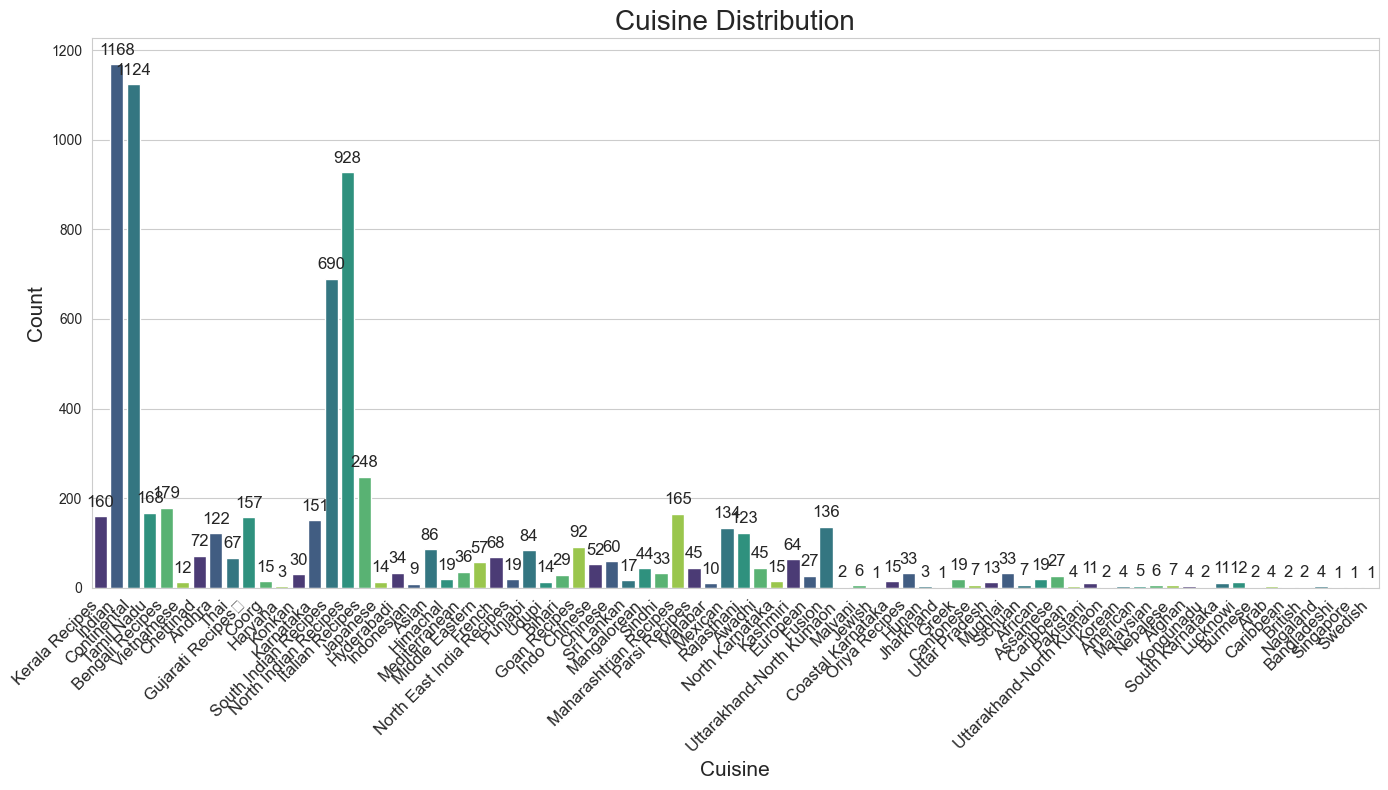

In [24]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create a larger figure
plt.figure(figsize=(14, 8))

# Create the count plot with a custom color palette
custom_palette = sns.color_palette("viridis")
plot = sns.countplot(x='cuisine', data=df, palette=custom_palette)

# Set title and labels with larger font sizes
plt.title('Cuisine Distribution', fontsize=20)
plt.xlabel('Cuisine', fontsize=15)
plt.ylabel('Count', fontsize=15)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=12)

for p in plot.patches:
    count = p.get_height()
    plot.annotate(f'{count:.0f}', 
                  (p.get_x() + p.get_width() / 2., p.get_height()), 
                  ha='center', va='center', 
                  xytext=(0, 10), 
                  textcoords='offset points', fontsize=12)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

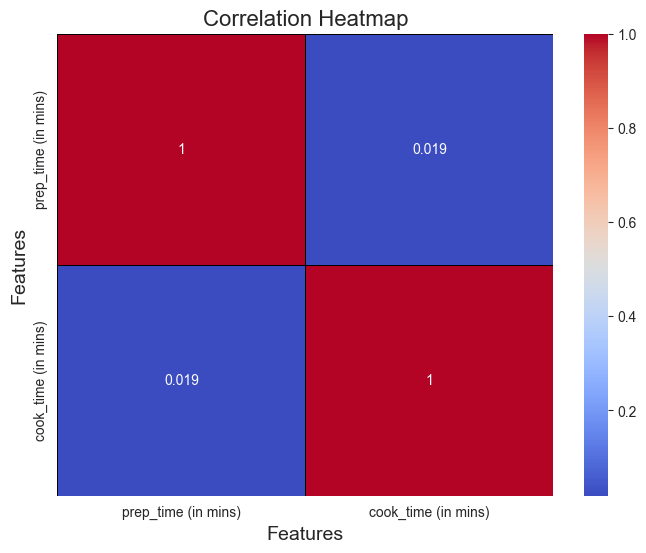

In [25]:
# Select numeric columns
numeric_cols = ['prep_time (in mins)', 'cook_time (in mins)']

# Calculate correlation matrix
corr_matrix = df[numeric_cols].corr()

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create a larger figure
plt.figure(figsize=(8, 6))

# Create the heatmap with improved readability
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, linecolor='black')

# Add title and labels
plt.title('Correlation Heatmap', fontsize=16)
plt.xlabel('Features', fontsize=14)
plt.ylabel('Features', fontsize=14)

# Show the plot
plt.show()


/Users/keerthireddy/Documents/GitHub/RecipeRecommendationSystem/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 65279 (\N{ZERO WIDTH NO-BREAK SPACE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


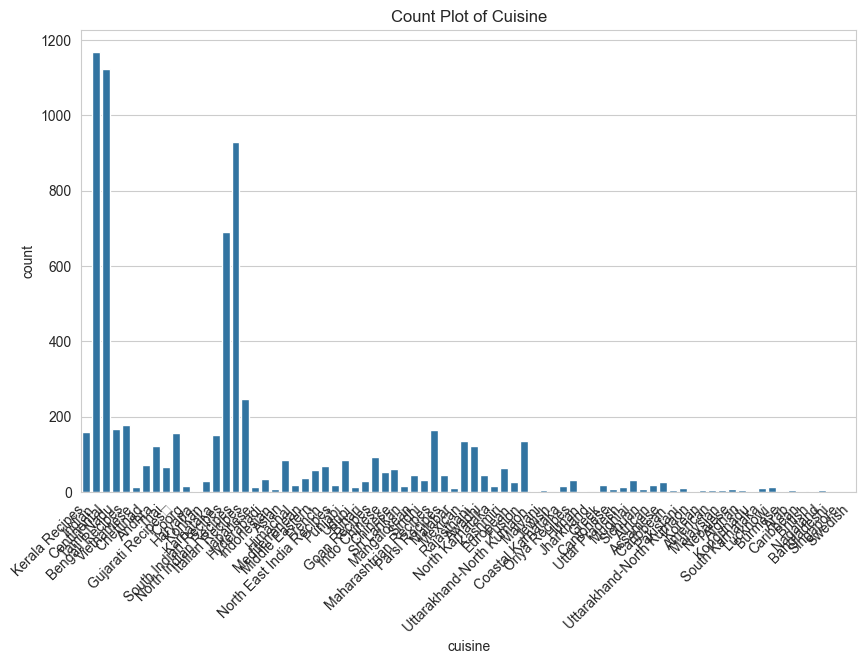

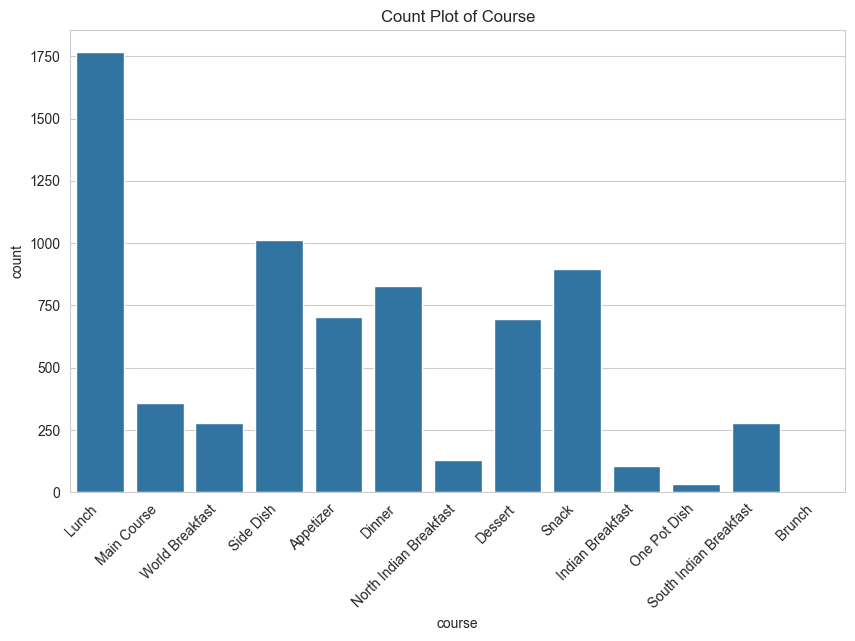

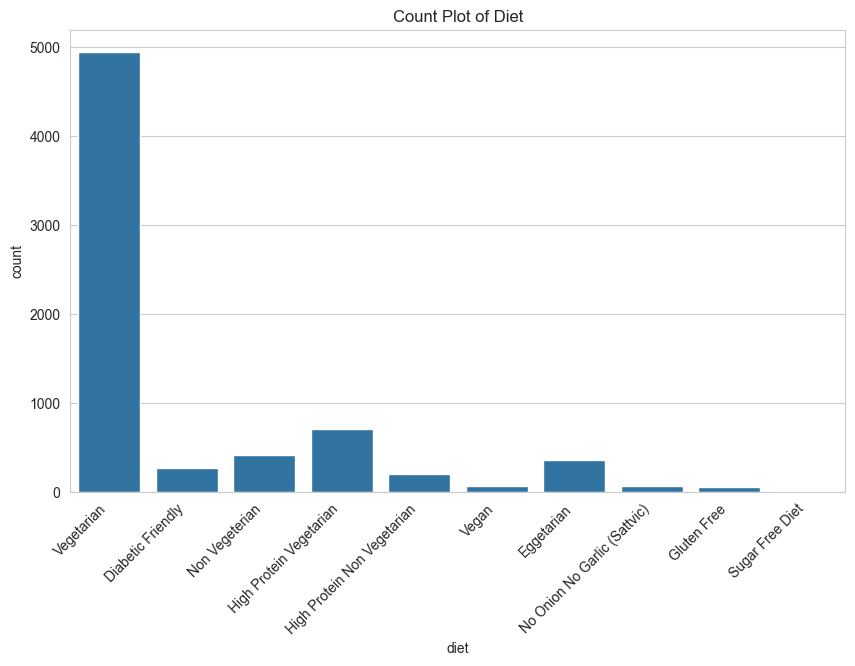

In [27]:
categorical_cols = ['cuisine', 'course', 'diet']
for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=col, data=df)
    plt.title(f'Count Plot of {col.capitalize()}')
    plt.xticks(rotation=45, ha='right')
    plt.show()


In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import GridSearchCV
from flask import Flask, request, jsonify


In [32]:
# Data cleaning
df['description'].fillna('', inplace=True)
df.dropna(subset=['cuisine', 'course', 'diet', 'ingredients_name', 'ingredients_quantity', 'prep_time (in mins)', 'cook_time (in mins)'], inplace=True)
df = df.drop_duplicates().reset_index(drop=True)
df['prep_time (in mins)'] = df['prep_time (in mins)'].astype(int)
df['cook_time (in mins)'] = df['cook_time (in mins)'].astype(int)
df = df.drop(['image_url'], axis=1)


/var/folders/d4/cdqb2nds3z920hd3m7jrzhbm0000gn/T/ipykernel_5999/2618853567.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['description'].fillna('', inplace=True)


In [33]:
# Feature engineering
df['ingredient_count'] = df['ingredients_name'].apply(lambda x: len(x.split(',')))
df['prep_time_category'] = pd.cut(df['prep_time (in mins)'], bins=[0, 10, 20, 30, 1000], labels=['short', 'medium', 'long', 'very long'])

In [34]:
# Verification of feature engineering
print(df.head())
print(df[['ingredient_count', 'prep_time_category']].describe())


                                                name  \
0  Mint Vegetables Moilee Recipe (Mixed Vegetable...   
1  Potato And Peas Curry Recipe In Coconut Milk G...   
2  Whole Wheat Chocolate Chip Pancakes With Apple...   
3  Kollu Pachadi Recipe (Sprouted Horse gram Rait...   
4                                   Recipe Bed Belts   

                                         description          cuisine  \
0  Moilee is a very traditional Kerala dish where...   Kerala Recipes   
1  Potato And Peas In Coconut Milk Curry Recipe i...           Indian   
2  Whole Wheat Chocolate Chip Pancakes with zeste...      Continental   
3  Kollu Pachadi Recipe (Sprouted Horse gram Rait...       Tamil Nadu   
4  Chingiri Paturi or Prawn Paturi is a famous tr...  Bengali Recipes   

            course               diet  \
0            Lunch         Vegetarian   
1      Main Course         Vegetarian   
2  World Breakfast         Vegetarian   
3        Side Dish  Diabetic Friendly   
4            Lunch 

In [35]:
# Vectorize ingredients
#TF-IDF Vectorization: Converts the 'ingredients_name' column into numerical features using TF-IDF (Term Frequency-Inverse Document Frequency). 
# This is a common method for converting text data into numerical data that can be used by machine learning models.
vectorizer = TfidfVectorizer(tokenizer=lambda x: x.split(','))
X = vectorizer.fit_transform(df['ingredients_name'])

/Users/keerthireddy/Documents/GitHub/RecipeRecommendationSystem/.venv/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:523: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [36]:
# Model building
knn = NearestNeighbors(n_neighbors=5, algorithm='auto').fit(X)

In [39]:
# Define a recommendation function
def recommend_recipes(input_ingredients, model, vectorizer, data):
    input_vector = vectorizer.transform([input_ingredients])
    distances, indices = model.kneighbors(input_vector)
    recommendations = data.iloc[indices[0]]

    # Format the recommendations as a list of dictionaries
    formatted_recommendations = recommendations.to_dict(orient='records')
    return formatted_recommendations


In [60]:
# Example input
input_ingredients = 'chicken, bread, pasta'
recommendations = recommend_recipes(input_ingredients, best_model, vectorizer, df)


In [61]:
# Display the recommendations in a tabular format
pd.set_option('display.max_colwidth', None)  # Disable truncation of column content
recommendations_df = pd.DataFrame(recommendations)
recommendations_df

,name,description,cuisine,course,diet,ingredients_name,ingredients_quantity,prep_time (in mins),cook_time (in mins),instructions,ingredient_count,prep_time_category
0,Vegetable Pasta Soup Recipe,"Vegetable pasta Soup is loaded with the goodness of Moroccan flavours and is a perfect hearty and filling soup to enjoy in cold winter days. Being diabetic friendly, this soup can be relished by all the family members as a light meal or starting dish.",Italian Recipes,Dinner,Vegetarian,"Mixed vegetables, Onion, Garlic, Tomatoes, Pasta, Kabuli Chana (White Chickpeas), Tomato Ketchup, Dried basil leaves, Cinnamon Powder (Dalchini), Paprika powder, Whole Black Peppercorns, Turmeric powder (Haldi), Salt, Water, Extra Virgin Olive Oil","2 cup Mixed vegetables , frozen or fresh 1 Onion , chopped 4 cloves Garlic , chopped 2 Tomatoes , diced 1/2 cup Pasta , whole wheat rotini, uncooked 1/2 cup Kabuli Chana (White Chickpeas) , uncooked 2 tablespoon Tomato Ketchup 1 teaspoon Dried basil leaves 1/4 teaspoon Cinnamon Powder (Dalchini) 1 teaspoon Paprika powder , or red chilli flakes 1/2 teaspoon Whole Black Peppercorns , crushed 1/2 teaspoon Turmeric powder (Haldi) Salt , to taste 4 cups Water 2 tablespoon Extra Virgin Olive Oil",10,30,"To begin with Vegetable Pasta Soup, heat olive oil in a pan and add garlic & onion. Cook it for about 1-2 minutes.After 1-2 minutes, add all remaining ingredients except pasta. Cook the mixture for 10 minutes or until vegetables are soft and tender.After 10 minutes, add the rotini pasta and cook for 8-10 minutes more. Season the delicious soup with more salt and pepper if required.Serve Vegetable Pasta Soup along with Beetroot Salad Recipe with Mixed Greens and Garlic Bread for a weekday dinner.",15,short
1,Achari Chicken Masala Pasta Recipe,Achari Chicken Masala Pasta recipe is a flavourful pasta recipe where pasta is cooked in achari sauce. You can make this pasta for your weekend dinner. You can also pack it in your kids' lunch boxes.,Fusion,Dinner,Non Vegeterian,"Garlic and oregano spread, garlic, onion, dried red chillies, chicken breast, salt, pickle mayo, milk, tomato puree, pasta","1 teaspoon garlic and oregano spread 6 cloves garlic, finely chopped 2 onions, thinly sliced ​​lengthwise 3 dried red chillies 2 chicken breasts, cut into thin strips Salt, to taste 3 tablespoons pickle mayo 3/4 cup milk 1/2 cup tomato puree 2 cups pasta, penne",10,30,"To make Achari Chicken Masala Pasta Recipe, first cook the pasta. Put water in a saucepan and let it boil. Add salt and boil. When the water starts boiling, add pasta and cook till the pasta is cooked. It will take 12 to 15 minutes. After the pasta is cooked, rinse it under cold water and keep it aside. Add some oil and mix it well. Now heat garlic and oregano spread in a pan. Add dried red chillies and cook for 10 seconds. Now add onion, garlic and cook till the onion turns golden. Now turn off the gas and let it cool. Put this mixture in the mixer grinder and make a paste. Keep it aside. Again heat garlic and oregano spread in a pan. Add chicken and cook for 6 to 8 minutes. Add tomato puree and let it boil. After the puree boils, add ground onion paste, achari mayo, milk and mix well. After 4 to 5 minutes add cooked pasta and mix it. Let it cook for another 3 to 4 minutes. Turn off the gas and serve. Serve Achari Chicken Masala Pasta Recipe with Garlic Bread and Salad of your choice for dinner.",10,short
2,Minestrone Soup Recipe,"The Minestrone soup has been an all time favorite soup at home, packed with nutrition and alot of energy making it a replacement for a wholesome meal and a light dinner. Minestrone (literally big soup) is a thick soup of Italian origin made with vegetables, often with the addition of pasta or rice. Common ingredients include beans, onions, celery, carrots, stock, and tomatoes. Serve Minestrone Soup Recipe with Herb Mushroom Bruschetta Recipe and Pineapple Carpaccio Recipe (Spiced Pineapple Salad with Ginger & Mint) for a weekend dinner.

In [59]:
# Increase the size of columns
pd.set_option('display.max_colwidth', None)  # Disable truncation of column content
pd.set_option('display.max_columns', None)  # Display all columns

# Apply styling to the DataFrame
styled_df = pd.DataFrame(recommendations).style.set_properties(**{
    'text-align': 'left',
    'white-space': 'pre-wrap',
}).set_table_styles([{
    'selector': 'th',
    'props': [('font-size', '12pt')]
}, {
    'selector': 'td',
    'props': [('font-size', '10pt')]
}])

# Display without index using HTML
from IPython.display import display, HTML

# Convert styled DataFrame to HTML
html = styled_df.to_html()

# Remove index from HTML
html = html.replace('<th></th>', '')
html = html.replace('<td class="data row0 col0" >', '<td class="data row0 col0" style="display: none;">')
html = html.replace('<td class="data row1 col0" >', '<td class="data row1 col0" style="display: none;">')
html = html.replace('<td class="data row2 col0" >', '<td class="data row2 col0" style="display: none;">')
html = html.replace('<td class="data row3 col0" >', '<td class="data row3 col0" style="display: none;">')
html = html.replace('<td class="data row4 col0" >', '<td class="data row4 col0" style="display: none;">')

display(HTML(html))

,name,description,cuisine,course,diet,ingredients_name,ingredients_quantity,prep_time (in mins),cook_time (in mins),instructions,ingredient_count,prep_time_category
0,Grated Cucumber Raita Recipe,"Grated Cucumber Raita Recipe is a tasty, simple and healthy raita recipe that can be had anytime of the year. It is especially beneficial when you have it with your meals during summers.",Indian,Side Dish,Vegetarian,"Cucumber, Curd (Dahi / Yogurt), Cumin seeds (Jeera), Red Chilli powder, Salt, Coriander (Dhania) Leaves","1 Cucumber , grated 1 cup Curd (Dahi / Yogurt) 1 teaspoon Cumin seeds (Jeera) 1/2 tablespoon Red Chilli powder Salt , to taste Coriander (Dhania) Leaves , a few, chopped",5,0,"To begin making Grated Cucumber Raita Recipe, we will first roast the cumin seeds.Add the cumin seeds into a preheated pan, saute and roast till the cumin seeds start to turn brown in colour. Once done turn off the heat and remove into a bowl to cool.Once the roasted cumin seeds have cooled add them to a mortar and pestle and powder the cumin seeds.Now whisk the yogurt in a bowl and add grated cucumber, roasted cumin powder, chili powder, salt and chopped coriander leaves. Stir well to combine and serve.Serve Grated Cucumber Raita Recipe with Green Moong Dal Pulao With Vegetables or Punjabi Aloo Paratha for a wholesome meal.",6,short
1,Kachumber Salad Recipe - Kachumber Salad Recipe,"Kachumber Salad is a fresh and simple summer salad made with cucumber, onion and tomatoes. You can also add carrots, pomegranate and fresh herbs to it. Serve it with your meal and enjoy its fresh taste.",Indian,Side Dish,Diabetic Friendly,"Cucumber, onion, green chilli, tomato, carrot, salt, pomegranate, black pepper powder, cumin powder, lemon juice, green coriander, mint","3 Cucumbers, peeled and chopped 1 Onion, finely chopped 1 Green Chillie, finely chopped 2 Tomatoes, chopped 1 Carrot, peeled and chopped Salt, to taste 1/4 Cup Pomegranate Black Pepper Powder, to taste 1 Tsp Cumin Powder, roasted 1-1/2 Tsp Lemon Juice Coriander Leaves, a little, finely chopped Mint Leaves, a little, finely chopped",10,5,"To make Kachumber Salad, take cucumber, onion, green chilli, tomato, carrot and pomegranate in a mixing bowl. Mix everything well. After mixing, add lemon juice, black pepper powder, cumin powder, salt and mix everything well. Now add coriander leaves, mint leaves and mix well. Serve. Serve Kachumber Salad with Panchmel Daal, Aloo Bhindi Sabzi and Phulkas for lunch.",12,short
2,Cucumber Mor Kuzhambu Recipe (Cucumber Curry),Cucumber Mor Kuzhambu is a delectable curry usually served with steamed rice. Cucumber pieces are cooked till soft and then mixed with a coconut-mustard-curd gravy. This simple curry is very flavourful and uses ingredients easily available in the pantry. This is a great way to use up leftover cucumbers lurking in the refrigerator. You can alternatively use white pumpkin.,South Indian Recipes,Lunch,Vegetarian,"Cucumber, Fresh coconut, Ginger, Mustard seeds (Rai/ Kadugu), Green Chillies, Turmeric powder (Haldi), Coriander (Dhania) Leaves, Hung Curd (Greek Yogurt), Salt","3 to 4 Cucumber , peeled and chopped 1/2 cup Fresh coconut , scrapped 1 inch Ginger , chopped 1 teaspoon Mustard seeds (Rai/ Kadugu) 3 to 4 Green Chillies , chopped 1/4 teaspoon Turmeric powder (Haldi) 5 to 6 sprig Coriander (Dhania) Leaves 2 to 3 tablespoons Hung Curd (Greek Yogurt) Salt , to taste",15,20,"To begin making the Cucumber Mor Kuzhambu recipe, firstly add the cucumber pieces along with 1/2 cup water and salt to a saucepan. Cook covered till the cucumber becomes just tender.Grind together the coconut, ginger, chillies, mustard, coriander, turmeric in a blender to a fine paste. Add little water if required to make a fine paste.Add this coconut paste to the cucumber. Cook on low heat for 2 to 3 minutes. Adjust water and salt if required.Add the curd and mix.Serve the Cucumber Mor Kuzhambu with steamed rice and Keerai Sambar for a comforting weekday meal.",9,medium
